In [6]:
# Initialize Otter
import otter
grader = otter.Notebook("hw4.ipynb")

# Hw 4: More Linear Regression 🎢

Name: Matthew DeSantis

Student ID: 488103

Collaborators:

## Instructions

For this homework, work through **Lab 4 (Predicting Housing Prices with Linear Regression)** first. Most of the things we ask you to do in this homework are explained in the lab. In general, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, and a legend when applicable).

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will be taken into account during the grading and regrading process.

In [7]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'my answer'

### Submission instructions
* Submit this Python notebook with your answers in the code cells as your homework submission.
* **Do not change the number of cells!** Your submission notebook should have exactly one code cell per problem. 
* Do **not** remove the `# your code here` line. Add your solution after that line.

## 1. Reviewing Regression

Let's warm up by considering a few facts about regression. You may refer to your notes, lecture slides, worksheet, and lab to help you answer these questions.

<!-- BEGIN QUESTION -->

### Problem 1.1

**Write-up!** What distinquishes regression tasks from classification and clustering tasks? Consider the input features and outputs of models from each type.

_Regression outputs a continuous variable, whereas classification and clustering do not._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 1.2

**Write-up!** Describe the procedure for "fitting" a linear regression model. What are the model's parameters and how many of them are there (if we consider each term in $w$ to be a separate parameter)? How do we find the optimal parameters for fitting our training data?

_You fit a linear regression model by minimizing the sum of squared errors. The parameters are w0 through wm, where m is the number of features we are factoring in. w0 is the intercept, and not related to the slope of any feature, so there are m+1 parameters in total._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 1.3

**Write-up!** Given two linear models, how do we decide which one fits the data _better_?

_Whichever one has the lower sum of squared errors is superior. We typically fit our data by minimizing that sum._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 1.4

**Write-up!** What is training error? What is testing error? What are their interpretations in the context of the data and what do they mean (in the context of the data)?

_Training error is the difference between the training data and the fitted data, testing error is the difference between the testing data and the fitted data. The training error can be interpretted as how well the model fits our given data, whereas the testing error shows how well our model fits future data._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 1.5

**Write-up!** Consider two models: the first is a linear model; the second is a polynomial model. The second model is more complex. Describe a situation where the polynomial model performs better (has less error) during training but the linear model performs better during testing. What is the name for what happened to the polynomial model?

_You could fit a polynomial model to perfectly go through every single point of data, resulting in zero error. However, in doing so, the model no longer fits the trend of the data, that is, it's ignoring the variance. This means it will preform poorly with new data, and this is an example of overfitting._

<!-- END QUESTION -->

## 2. Linear Regression with More Features

In this week's lab, we implemented a linear regression model that could map a single predictor feature to a target variable. This is also called _simple linear regression_. In the case of the Boston housing dataset, we could map features like the "average number of rooms per dwelling" to a house's price. In reality, however, a single predictor is not enough to get a good model. Additionally, we have data for several predictors so why not make use of that?

In this series of problems, let's explore how we can build a multi-dimensional linear model also called _multiple linear regresison_.

### Scikit-Learn

Generalizing our derivation of a 1D linear regression to a multi-dimensionional one is non-trivial since we would need to convert our computations into matrix operations, which are beyond the scope of this class. However, that does not mean that we can't do multi-dimensional linear regressions. The package we will introduce today is [Scikit-learn](https://scikit-learn.org/stable/). It contains many generalized implementations of common learning models and we will be using its implementation of multi-dimensional linear regression here.

You have already seen Scikit-learn, or `sklearn`, before since it is where we got our Boston housing data in the lab.

In [8]:
from sklearn.datasets import load_boston
import numpy as np
boston = load_boston()

In [9]:
X = np.array(boston.data)
y = np.array(boston.target)

Using `sklearn` is very similar to our implementation from the lab, though there is a slight difference: we work with a model object. In the following cell, we create an instance of linear regression model called `model`.

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

The `fit` and `predict` functions that we used previously are analogous to the `fit` and `predict` methods of `model`. Here is a quick example of how to perform 1D linear regression, mapping the `CRIM` predictor to housing price.

In [11]:
feature_to_use = 'CRIM'
x_crim = X[:, boston.feature_names.tolist().index(feature_to_use)].reshape(-1, 1)


# you should create a new model object for each new model you create
model = LinearRegression()

# fitting the model
model.fit(x_crim, y)

# predicting with the model


x_star = np.linspace(x_crim.min(), x_crim.max(), 1001).reshape(-1, 1)
model.predict(x_star)

array([ 24.03048217,  23.99354274,  23.95660331, ..., -12.83506817,
       -12.8720076 , -12.90894703])

<!-- BEGIN QUESTION -->

### Problem 2.1

**Write-up!** There are several things wrong with the example above. What do you see? `HINT`: think back to the model building part of the data science workflow.

_The main issue is that all of the data is used for training, leaving no data to test with._

<!-- END QUESTION -->

### Problem 2.2

Now that we are familiar with `sklearn`, let's start building a linear model that uses all of the acceptable features in our dataset. You can refer to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for more information about how to use `LinearRegression`.


**Do this!** Create the _feature matrix_ `X_good2use`, including all data points and all features but "the proportion of blacks by town," which is encoded as `'B'`. The reason we want to do this is to remove possible bias/predicting "power" to be based on race (it is not something of importance and including it is underrepresenting all minorities, as they are not included in this data set).
> **Note**: A _matrix_ is a 2-dimensional array. In **mathematical terms** we speak of _scalars_, _vectors_, and _matrices_ rather than single/multiple valued variables or 1D and 2D arrays. Also note that we typically use the following notation convention:
* $x$, $y$, $a$, $b$, ... denote _scalars_, 
* **x** or $\vec{x}$, $\vec{y}$, $\vec{a}$, $\vec{b}$, ... denote _vectors_, and 
* $X$, $Y$, $A$, $B$, ...  denote _matrices_.  

*Note: this question has hidden tests, or is graded on style of code and not just answer alone.*

In [12]:
X_good2use = np.delete(X, 11, 1)

In [13]:
grader.check("q2bi")

q2bi results: All test cases passed!

**Do this!** Build a model that uses _all_ of the remaining predictor features in the Boston housing dataset. Remember to create a new instance of `LinearRegression` and assign it to the `model` variable. Also make sure that you do a train/test split of your data so we can evaluate our model after training (use `random_state=10` so we can compare our results to the ones from `Lab4`; refer to the lab for an example of how to do this). If you were successful, you will see the weights for the model below.

*Note: this question has hidden tests, or is graded on style of code and not just answer alone.*

In [14]:
from sklearn.model_selection import train_test_split


N = len(y)
X_train, X_test, y_train, y_test = train_test_split(X_good2use, y, test_size=0.2, random_state=10)


model = LinearRegression()
model.fit(X_train, y_train)



# Get the model parameters
b = model.intercept_
w = model.coef_
print(b)
print(w)

# Now, w is a vector! With a weight parameter for every feature.
print(w.shape)

43.412577421669866
[-1.41891575e-01  6.49152667e-02 -2.33522825e-02  2.25258760e+00
 -1.77777909e+01  2.85771726e+00  1.94700917e-02 -1.52767441e+00
  2.79945900e-01 -1.24541738e-02 -7.94521954e-01 -6.10333165e-01]
(12,)


In [15]:
grader.check("q2bii")

q2bii results: All test cases passed!

### Problem 2.3

Now that we have a trained model, we can use it to make some predictions using the testing set.

**Do this!** Use your model to compute the predicted prices of the points in your testing set and store these into the variable `y_prediction`. Then, compute the RMSE of these predictions and store the value in `rmse`. If all went well, you should see the RMSE value you computed as the output of the cell. *Hint: You can use the sklearn mean_squared_error function*

*Note: this question has hidden tests, or is graded on style of code and not just answer alone.*

In [16]:
from sklearn.metrics import mean_squared_error

y_prediction = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_prediction))

f'RMSE: {rmse}'

'RMSE: 5.7928104298759076'

In [17]:
grader.check("q2c")

q2c results: All test cases passed!

<!-- BEGIN QUESTION -->

### Problem 2.4

Let's talk about this result.

**Write-up!** What did you notice about this result and how does it compare to those of individual predictors from `Lab4`? Is this what you expected to see?

_The result is smaller than the results from the individual predictors in Lab4, as expected._

<!-- END QUESTION -->

## 3. Introducing a New Metric

RMSE is a good measure for how well a model fits, but one could argue it is not the most intuitive. An alternative measure is $R^2$, or the **coefficient of determination**, which is essentially a measure of how close the data are to the fitted regression line. RMSE is a number in the units of the original target variable. $R^2$ is a value between 0 and 1, where increasing values indicate better fit (1 means a perfect fit). In this way, $R^2$ is a good place to start when evaluating a regression model because it is easy to interpret.

$$R^2 = 1 - \frac{\displaystyle \frac{1}{n} \sum_{n=1}^n (y_i - f(x_i))^2}{\displaystyle \frac{1}{n} \sum_{n=1}^n (y_i - \bar y)^2}$$

> _For those who are interested_: Those of you that are statistically savvy, or read the lab very thoroughly (which you should do regardless!!), will remember that these sums are mean squared errors. The numerator is the MSE of the true values compared to the predicted value and the denominator is the MSE of the true value relative to the mean value. The denominator is the variance of the response variable (e.g. house price). One way to interpret this metric is that it computes the ratio between how much variation is explained by the model and the total variation in the data.

### Problem 3.1

**Do this!** Complete the function below so that it computes the $R^2$ value of a model given some `predictions` and their true `labels`. To receive full credit, implement the math yourself; do not rely on other, already implemented functions. Store your computed result in the `r2` variable.

> Do **not** use any built-in functions from scikit-learn for this problem. 

In [18]:
def r_squared(predictions, labels):
    n = len(labels)
    ymean = sum(labels)/n
    sumymp2 = sum((labels - predictions)**2)
    sumymm2 = sum((labels - ymean)**2)
    
    
    r2 = 1 - ((sumymp2))/((sumymm2))
    
    return r2

In [19]:
grader.check("q3a")

q3a results: All test cases passed!

## 4. Using a More Complex Model

There are a lot of options we can choose from when it comes to picking a model to use when analyzing our data. In this section, we will take a look at a more complex model: **polynomial regression**. We will also investigate some of the considerations one should make when picking a model.

![poly_reg](utility/pics/poly-regression.png)

### Back to Toy Data

As mentioned in earlier, it is really hard to visualize multi-dimensional datasets, so for this section, we will fall back to the toy data we used from `Lab4`.

In [21]:
x, y = np.loadtxt('utility/data/toy_data.txt')

Polynomial regression models are really just extensions of the linear models that we are already familiar with. The difference comes from how we preprocess our data. The specifics of how this works is beyond the scope of this course (see CSE417T for more information or ask a TA).

In order to build a polynomial model, we will need to do some preparation. `sklearn`'s models require that the input data is an $n$-dimensional array. Since our input array `x` is a 1D array for the toy data set, we will need to reshape it into a 2D array. The lambda function provided in the following cell, `reshape`, will take care of this for you — use it when applicable (see Lab 0 for a refresher on lambda functions if needed).

In [22]:
reshape = lambda x: x.reshape(-1, 1)

<!-- BEGIN QUESTION -->

### Problem 4.1

The next thing we will need to do is fit a linear model that will serve as our baseline.

**Do this!** Create a new linear model and fit it with the toy data set and create a plot showing the scattered data points `x, y` and the predicted values of the model (don't forget all of the necessary plot components!). You don't need to worry about making a train/test split for this section.

Plots configured! 📊


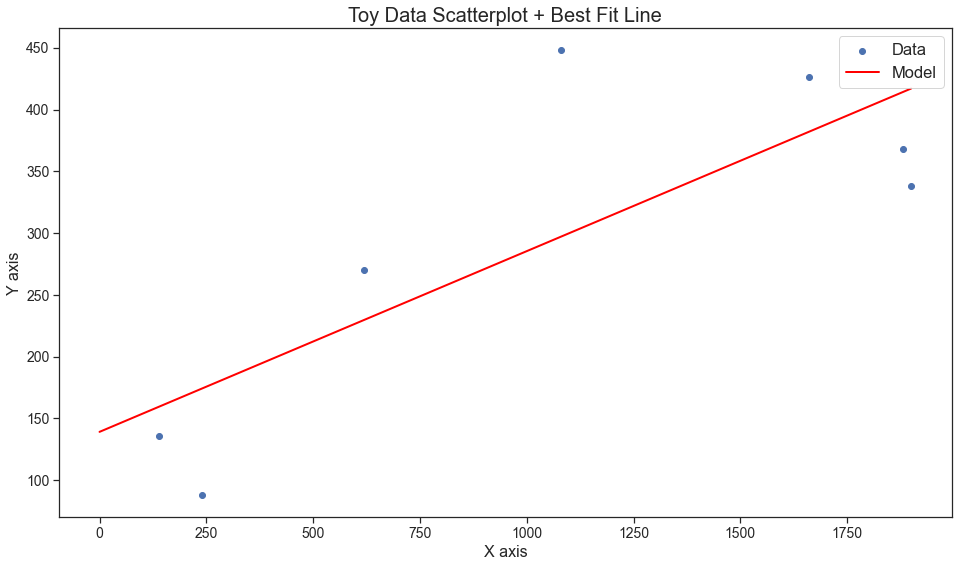

In [23]:
import matplotlib.pyplot as plt
from utility.util import configure_plots

configure_plots() # for pretty plots

linear_model = LinearRegression()
linear_model.fit(reshape(x), y)

b = linear_model.intercept_
w = linear_model.coef_

x_star = np.linspace(0, x.max(), 1000)
preds = w*x_star + b

ax1 = plt.scatter(x,y)
ax2, = plt.plot(x_star, preds, color = "red")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend((ax1, ax2), ('Data', 'Model'))
plt.title("Toy Data Scatterplot + Best Fit Line")
plt.show()

<!-- END QUESTION -->

### Doing Polynomial Regression

Next, we will provide a function that produces fitted polynomial regression models. Again, you don't need to worry too much about how this works, but you are welcome to try to understand it.

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def make_poly(x, y, degree=2):
    '''creates and returns a polynomial regression model fit with input data X and Y'''
    
    polynomial_features = PolynomialFeatures(degree=degree)
    poly_model = Pipeline([("polynomial_features", polynomial_features),
                           ("linear_regression", LinearRegression())])

    return poly_model.fit(reshape(x), y)

<!-- BEGIN QUESTION -->

### Problem 4.2

Let's try using the `make_poly` function.

**Do this!** Use `make_poly` to, well, make a polynomial regression model with a `degree` of 2. This model will fit the data with a quadratic function. Store the model you created in `poly2_model` and create a plot showing the scattered data points `x, y` and the predicted values of the model (with all of the necessary plot components!). `HINT` you will need to make an array of equally spaced values over an interval (see [`np.linspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)) for your predicted values; refer to `Lab4`.

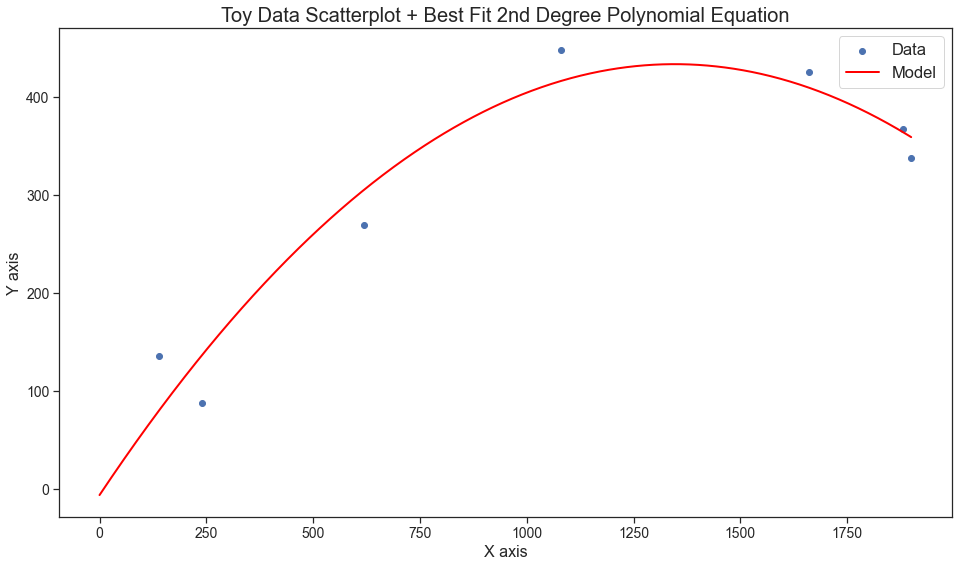

In [25]:
poly2_model = make_poly(reshape(x),y,2)

x_star = np.linspace(0, x.max(), 1000)
preds =poly2_model.predict(reshape(x_star))

ax1 = plt.scatter(x,y)
ax2, = plt.plot(x_star, preds, color = "red")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend((ax1, ax2), ('Data', 'Model'))
plt.title("Toy Data Scatterplot + Best Fit 2nd Degree Polynomial Equation")
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 4.3

Nice, that worked well! Let's up the complexity again. Try to play around with the degree and find the one that produces the "best-fitting" model.

**Do this!** Use `make_poly` and try to find the "best-fitting" model (based on $R^2$) by experimenting with the `degree` argument. Store this model in `poly_best_model`. Then, create a plot showing the scattered data points `x, y` and the predicted values of the model. Make sure your graph has the proper components. `HINT` you can use the `r_squared` metric you implemented from before to evaluate the fit of your model.

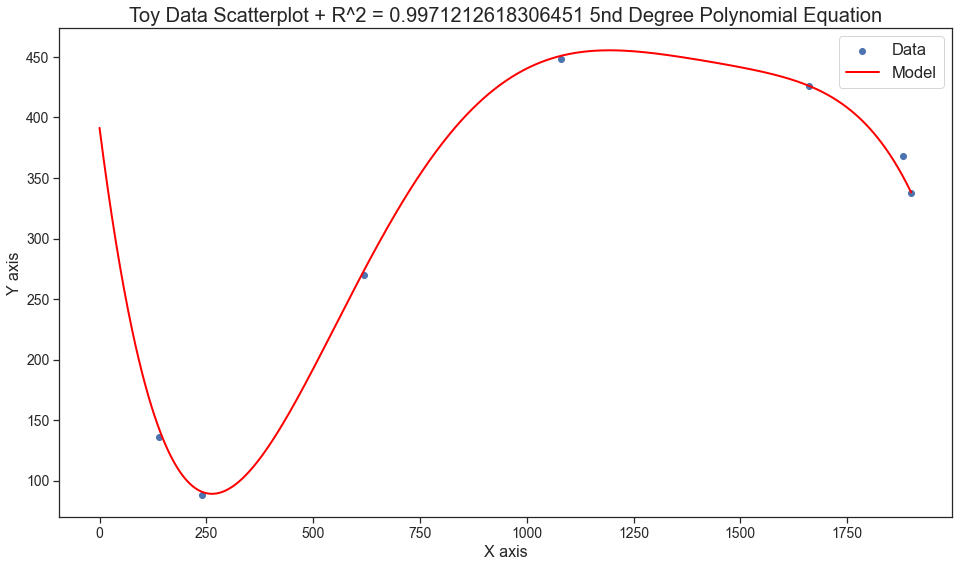

In [26]:
degree_arg = 5

poly_best_model = make_poly(reshape(x),y,degree_arg)

x_star = np.linspace(0, x.max(), 1000)
preds = poly_best_model.predict(reshape(x_star))
labels = poly_best_model.predict(reshape(x))
R2 = r_squared(labels, y)

ax1 = plt.scatter(x,y)
ax2, = plt.plot(x_star, preds, color = "red")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend((ax1, ax2), ('Data', 'Model'))
plt.title("Toy Data Scatterplot + R^2 = " + str(R2) + " " + str(degree_arg) + "nd Degree Polynomial Equation")
plt.show()


<!-- END QUESTION -->

### Evaluating the Models

Let's compare the RMSE and $R^2$ metrics for the models that we have produced.

*Note: this question has hidden tests, or is graded on style of code and not just answer alone.*

### Problem 4.4

**Do this!** Fill in the following `for` loop to print out the RMSE and $R^2$ metrics for each model in `models`.

In [27]:
models = {
    'Linear': linear_model,
    '2nd Order Polynomial': poly2_model,
    'Best Fitting Polynomial': poly_best_model
}

model_eval = {}
RMSE_IDX = 0
R2_IDX = 1

for name, toy_model in models.items():
    
    RMSE = np.sqrt(mean_squared_error(y, toy_model.predict(reshape(x))))
    R2 = r_squared(y, toy_model.predict(reshape(x)))
    
    model_eval[name] = (RMSE, R2)
    
    
# now we print our values
for name, evals in model_eval.items():
    print(name)
    print(f'RMSE: {evals[RMSE_IDX]:0.3f}')
    print(f'R2: {evals[R2_IDX]:0.3f}')
    print()

Linear
RMSE: 78.098
R2: 0.421

2nd Order Polynomial
RMSE: 34.717
R2: 0.922

Best Fitting Polynomial
RMSE: 6.921
R2: 0.997



<!-- BEGIN QUESTION -->

### Problem 4.5

**Write-up!** What do you notice about the scores? Given these results, which model would you pick to deliver to a client? Why?

_Given these scores, I would pick the "best fitting polynomial", as it has the highest R2 and the lowest RMSE. However, I do worry that there may have been some overfitting involved, since I was not able to test any of these models on testing data, and instead optimized completely to the training data, which was the only data I had in this case._

<!-- END QUESTION -->

### Stacking Up Against the Real Function

What if I told you the true function was $$y = 0.16x + 120$$

The following function, `ground_truth`, will return `x` and `y` values produced by the true function with some added noise. We can use this to produce other points that could have been generated by the same function.

In [28]:
def ground_truth(n):
    '''returns N random samples from the function above'''
    
    w, b = 0.16, 120
    noise = np.random.rand(n) * 350
    noise = noise - np.mean(noise)
    x = np.random.randint(0, 2000, n)
    y = w * x + b + noise
    
    return x, y

<!-- BEGIN QUESTION -->

### Problem 4.6

**Do this!** With `ground_truth`, make a plot that shows these five things (and all plot components! We will stop reminding you about including these from here on out, so be sure to not forget them for all plots you create moving forward!):
1. The points from the toy dataset
2. 200 points generated from the true function
3. The linear model
4. The "best-fit" polynomial model
5. The true function

You don't need to retrain the models for this part. To receive full points, ensure that your plot has all of the proper components, including a legend (see `Lab4` for an example of how to do this).

In [29]:
x_truth, y_truth = ground_truth(200)

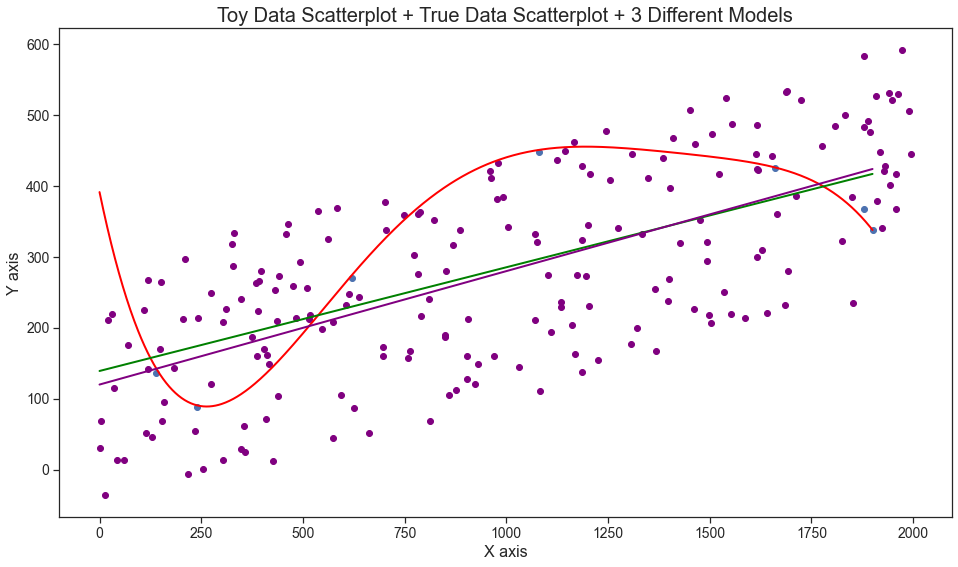

In [30]:

truey = 0.16*x_star + 120


x_star = np.linspace(0, x.max(), 1000)
predsbest = poly_best_model.predict(reshape(x_star))
predslin = linear_model.predict(reshape(x_star))


ax1 = plt.scatter(x,y)
ax2 = plt.plot(x_star, predsbest, color = "red")
ax3 = plt.scatter(x_truth, y_truth, color = "purple")
ax4 = plt.plot(x_star, predslin, color = "green")
ax5, = plt.plot(x_star, truey, color = "purple")


plt.xlabel("X axis")
plt.ylabel("Y axis")
#plt.legend((ax1, ax2, ax3, ax4, ax5), ('Toy Data', 'Best Fit Model', 'True Data', 'Linear Model', '2nd Degree Polynomial Model'))
plt.title("Toy Data Scatterplot + True Data Scatterplot + 3 Different Models")
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 4.7

**Write-up!** What happened in the plot from [Problem 4.6](#Problem-4.6)? Describe how well both models fit the (traning vs test) data. What does it tell us about model complexity and number of traning examples? Why must we be careful of the models that we use to analyze our data?

_The linear model fits the test data the best, whereas the "best fit model" fits the test data best. This tells us that the "best fit model" is actually a horribly overfit model which does not accurately fit the real data at all. This means that we should always split our data into training/testing data, try to have large sample sizes, and be wary of making our predictive models too complex, making sure to remember that error is always going to be a part of our data, and we should be fitting the trend, not the error._

<!-- END QUESTION -->

And we're done.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [44]:
grader.check_all()

q2bi results: All test cases passed!

q2bii results: All test cases passed!

q2c results: All test cases passed!

q3a results: All test cases passed!

q4d results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [32]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)